In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd

In [ ]:
# import requests
# # https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/
# url = 'http://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz'
# target_path = '/kaggle/working/BreaKHis_v1.tar.gz'

# response = requests.get(url, stream=True)
# if response.status_code == 200:
#     with open(target_path, 'wb') as f:
#         f.write(response.raw.read())
!wget http://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz
!tar -xzf BreaKHis_v1.tar.gz -C .
# !mv /kaggle/working/BreaKHis_v1/BreaKHis_v1/ /kaggle/working/

In [7]:
magnif = 400
cancer_type = "benign"
subtype = "adenosis"
base_path = "./BreaKHis_v1/histology_slides/breast"
base_path = f"./BreaKHis_v1/histology_slides/breast/{cancer_type}/SOB/adenosis/SOB_B_A_14-22549AB/{magnif}X"
image_names = os.listdir(base_path)

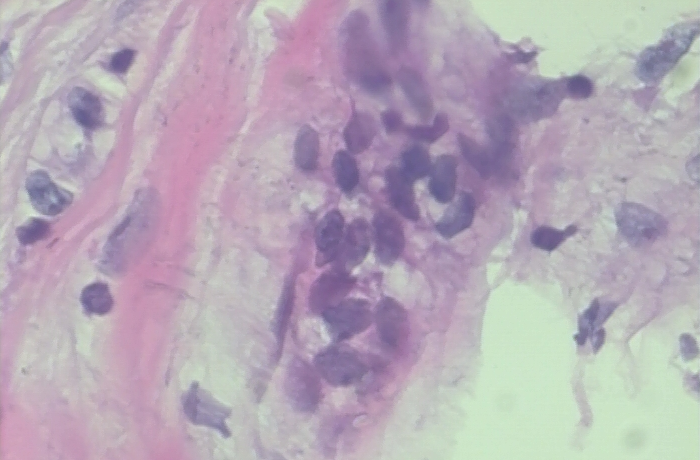

In [8]:
# img = Image.open("./BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/200X/SOB_B_A-14-22549AB-200-032.png")
img = Image.open(f"{base_path}/{image_names[10]}")
# extract label from image
img

## Process images

In [10]:
base_path = "./BreaKHis_v1/histology_slides/breast"

In [35]:
# sample n images from each slide and save to new folder
n_samples_per_slide = 2
labels = []
file_names = []
cancer_types_list = []
magnif_list = []
subtypes_list = [] 
images = []

magnifications = [100, 200, 400]
for cancer_type in os.listdir(base_path):
    # check if folder
    if not os.path.isdir(f"{base_path}/{cancer_type}"):
        continue
    cancer_path = f"{base_path}/{cancer_type}/SOB"
    for subtype in os.listdir(cancer_path):
        for slide in os.listdir(f"{cancer_path}/{subtype}"):
            for magnif in magnifications:
                slide_path = f"{cancer_path}/{subtype}/{slide}/{magnif}X"
                if not os.path.isdir(slide_path):
                    continue
                image_names = os.listdir(slide_path)
                num_images = len(image_names)
                # randomly sample n images from slide
                n_samples_local = min(n_samples_per_slide, num_images)
                sample_indices = np.random.choice(num_images, n_samples_local)

                for i in sample_indices:
                    # print(i)
                    img = Image.open(f"{slide_path}/{image_names[i]}")
                    images.append(img)
                    labels.append(cancer_type)
                    file_names.append(image_names[i])
                    cancer_types_list.append(cancer_type)
                    magnif_list.append(magnif)
                    subtypes_list.append(subtype)

In [36]:
info = pd.DataFrame(
    {
        "file_name": file_names,
        "cancer_type": cancer_types_list,
        "subtype": subtypes_list,
        "magnification": magnif_list,
        "label": [1 if label == "malignant" else 0 for label in labels],
    }
)

In [38]:
info

,file_name,cancer_type,subtype,magnification,label
0,SOB_M_DC-14-20629-100-005.png,malignant,ductal_carcinoma,100,1
1,SOB_M_DC-14-20629-100-019.png,malignant,ductal_carcinoma,100,1
2,SOB_M_DC-14-20629-200-012.png,malignant,ductal_carcinoma,200,1
3,SOB_M_DC-14-20629-200-007.png,malignant,ductal_carcinoma,200,1
4,SOB_M_DC-14-20629-400-008.png,malignant,ductal_carcinoma,400,1
...,...,...,...,...,...
487,SOB_B_A-14-29960CD-100-004.png,benign,adenosis,100,0
488,SOB_B_A-14-29960CD-200-011.png,benign,adenosis,200,0
489,SOB_B_A-14-29960CD-200-009.png,benign,adenosis,200,0
490,SOB_B_A-14-29960CD-400-001.png,benign,adenosis,400,0


In [37]:
index = 50
info.iloc[index], images[index]

(file_name        SOB_M_DC-14-17901-200-002.png
 cancer_type                          malignant
 subtype                       ductal_carcinoma
 magnification                              200
 label                                        1
 Name: 50, dtype: object,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=700x460>)

## Save images

In [42]:
images[0].filename.split("/")[-1]

'SOB_M_DC-14-20629-100-005.png'

In [43]:
save_path = "./data/breakhis_v1"
for image in images:
    # save image
    img_name = image.filename.split("/")[-1]
    image.save(f"{save_path}/{img_name}")

In [44]:
info.to_csv(f"{save_path}/info.csv", index=False)

In [ ]:
# zip images
!zip -r ./data/breakhis_v1.zip ./data/breakhis_v1